In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, sys

In [2]:

# Generate synthetic data
x = np.random.normal((-0.5, -0.5), 0.2, (200, 2))
x = np.append(x, np.random.normal((-0.25, 1), 0.2, (100, 2)), axis=0)
x = np.append(x, np.random.normal((0.5, 0.5), 0.2, (150, 2)), axis=0)


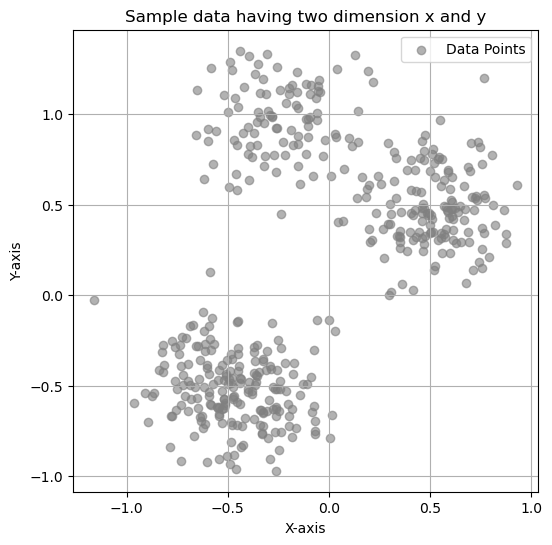

In [3]:
# Plot 1: Input Data with clusters
plt.figure(figsize=(6, 6))
plt.scatter(x[:, 0], x[:, 1], label="Data Points", c="gray", alpha=0.6)
plt.title("Sample data having two dimension x and y")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)

In [4]:
from ssom import SSOM 

In [5]:
# Initialize the SSOM with a 1D grid of size 20
som = SSOM(grid_size=20, num_iterations=1000, grid_shape="1D")
# Train SSOM (default setting using Euclidean distance)
som.train(x)

SSOM Initial Settings:
  Grid Shape: 1D
  Grid Size: 20
  Number of Iterations: 1000
  Max Learning Rate: 0.1
  Learning Decay: 0.25
  Neighborhood Decay: 0.5
  Metric: euclidean
  Log Interval: 10

Initialized SOM grid with random weights.
Iter 1000/1000 [==================================================]  LearnRate: 0.0018


In [6]:
somgrid = som.som_grid
print(somgrid.shape)

(20, 2)


In [7]:
clusters = som.sample_bmu_mapping

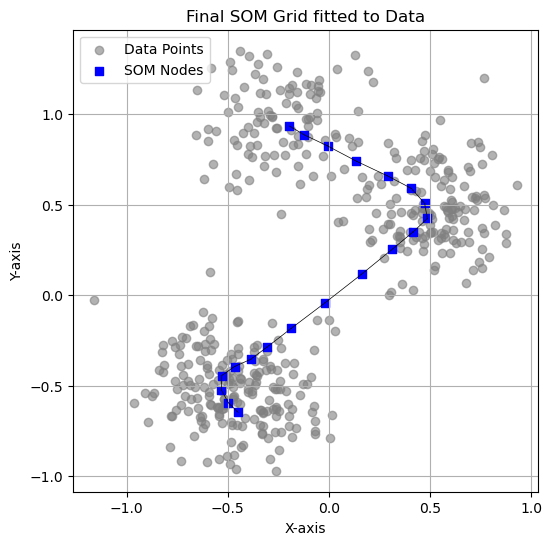

In [8]:
# Final Results - SOM Grid fitted to data
plt.figure(figsize=(6, 6))
plt.scatter(x[:, 0], x[:, 1], label="Data Points", c="gray", alpha=0.6)
plt.scatter(somgrid[:, 0], somgrid[:, 1], c="blue", marker="s", label="SOM Nodes")
# Draw lines between neighboring nodes in the 1D grid
for j in range(len(somgrid) - 1):
    plt.plot([somgrid[j, 0], somgrid[j + 1, 0]], [somgrid[j, 1], somgrid[j + 1, 1]], "k-", linewidth=0.5)
plt.title("Final SOM Grid fitted to Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)

In [9]:
from PIL import Image
# Directory to save temporary images
odir = "fig/somtrain_1dtopo/"
if not os.path.exists(odir): os.makedirs(odir)

# List to store file paths of saved images for GIF creation
filenames = []

# Plot 1: Input Data with clusters
plt.figure(figsize=(6, 6))
plt.scatter(x[:, 0], x[:, 1], label="Data Points", c="gray", alpha=0.6)
plt.title("Input Data with Clusters")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
filename = odir+"/plot_input_data.png"
plt.savefig(filename)
filenames.append(filename)
plt.close()

# Plot 2: Historical SOM Grid with selected data point connection to BMU
for i, (som_grid, selected_patch, bmu_index) in enumerate(zip(som.som_grid_history, som.selected_data_point_history, som.bmu_history)):
    plt.figure(figsize=(6, 6))
    plt.scatter(x[:, 0], x[:, 1], label="Data Points", c="gray", alpha=0.6)

    # Plot SOM nodes in 1D grid
    plt.scatter(som_grid[:, 0], som_grid[:, 1], c="blue", marker="s", label="SOM Nodes")
    
    # Draw lines between neighboring nodes in the 1D grid
    for j in range(len(som_grid) - 1):
        plt.plot([som_grid[j, 0], som_grid[j + 1, 0]], [som_grid[j, 1], som_grid[j + 1, 1]], "k-", linewidth=0.5)
    
    # Highlight the connection between the selected data point and its BMU
    bmu_pos = som_grid[bmu_index]
    plt.plot([selected_patch[0], bmu_pos[0]], [selected_patch[1], bmu_pos[1]], "r-", alpha=0.7, label="Selected Patch to BMU")
    plt.scatter(selected_patch[0], selected_patch[1], c="red", marker="x", label="Selected Data Point", s=100)

    plt.title(f"SOM Grid - Iteration Step {som.step_history[i]}")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid(True)

    filename = f"{odir}/plot_historical_{i}.png"
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

# Plot 3: Final Results - SOM Grid fitted to data
plt.figure(figsize=(6, 6))
plt.scatter(x[:, 0], x[:, 1], label="Data Points", c="gray", alpha=0.6)
plt.scatter(som.som_grid[:, 0], som.som_grid[:, 1], c="blue", marker="s", label="SOM Nodes")
# Draw lines between neighboring nodes in the 1D grid
for j in range(len(som.som_grid) - 1):
    plt.plot([som.som_grid[j, 0], som.som_grid[j + 1, 0]], [som.som_grid[j, 1], som.som_grid[j + 1, 1]], "k-", linewidth=0.5)
plt.title("Final SOM Grid fitted to Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)

filename = odir+"/plot_final.png"
plt.savefig(filename)
filenames.append(filename)
plt.close()

# Create the GIF from the saved images
images = [Image.open(f) for f in filenames]
gif_path = "fig/som_training1d.gif"
images[0].save(gif_path, save_all=True, append_images=images[1:], duration=500, loop=0)


print(f"GIF created at: {gif_path}")


GIF created at: fig/som_training1d.gif


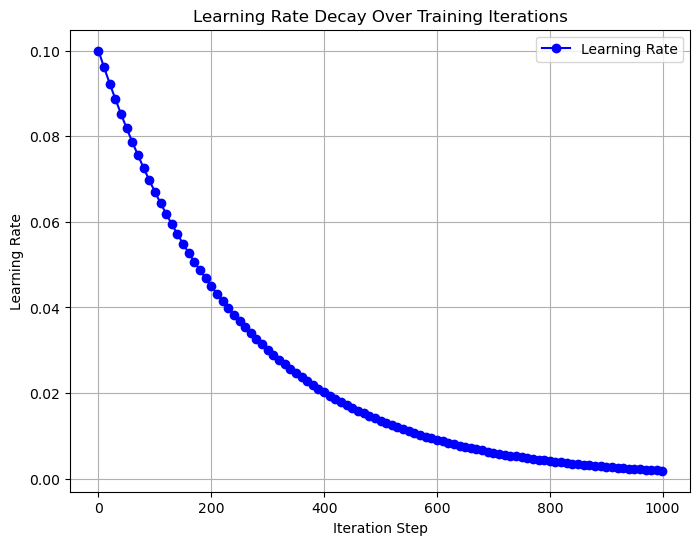

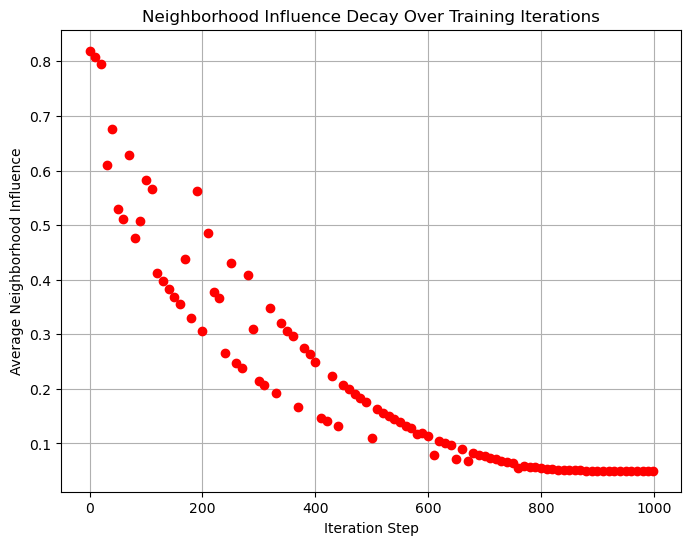

In [10]:
# Plot the learning rate history
plt.figure(figsize=(8, 6))
plt.plot(som.step_history, som.learning_rate_history, marker="o", linestyle="-", color="b", label="Learning Rate")
plt.title("Learning Rate Decay Over Training Iterations")
plt.xlabel("Iteration Step")
plt.ylabel("Learning Rate")
plt.legend()
plt.grid(True)

# Plot the neighborhood influence history
plt.figure(figsize=(8, 6))
for i, neighborhood_influence in enumerate(som.neighborhood_influence_history):
    avg_influence = np.mean(neighborhood_influence)
    plt.plot(som.step_history[i], avg_influence, "ro")
plt.title("Neighborhood Influence Decay Over Training Iterations")
plt.xlabel("Iteration Step")
plt.ylabel("Average Neighborhood Influence")
plt.grid(True)